# Proyek Analisis Data: E-Commerce
- **Nama:** Matthew Michael Gideon
- **Email:** mattmicgid@gmail.com
- **ID Dicoding:** mattmicgid

## Menentukan Pertanyaan Bisnis

- Dimana pembelian terbanyak pada masing-masing negara bagian dan produk dengan kategori apa yang paling sering dibeli pada negara bagian dengan pembelian terbanyak
- Bagaimana korelasi antara jenis pembayaran pengguna dengan tingkat kepuasan pengguna dalam data E-Commerce tersebut

## Import Semua Packages/Library yang Digunakan

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Wrangling

### Gathering Data

####Memuat data tabel customers

In [124]:
customers_df = pd.read_csv('/content/drive/MyDrive/dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####Memuat data tabel geolocation

In [125]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


####Memuat data tabel order items

In [126]:
order_items_df = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


####Memuat data tabel order payments

In [127]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####Memuat data tabel order reviews

In [128]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####Memuat data tabel orders

In [8]:
orders_df = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####Memuat data tabel product category

In [129]:
product_category_df = pd.read_csv('/content/drive/MyDrive/dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


####Memuat data tabel products

In [130]:
products_df = pd.read_csv('/content/drive/MyDrive/dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


####Memuat data tabel sellers

In [131]:
sellers_df = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#####Menilai data customers



In [132]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            9

In [133]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [134]:
print("Jumlah duplikasi:", customers_df.duplicated().sum())

Jumlah duplikasi: 0
Jumlah duplikasi: 0


In [135]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#####Menilai data geolocation


In [136]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  f

In [137]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [138]:
print("Jumlah duplikasi:", geolocation_df.duplicated().sum())

Jumlah duplikasi: 261831
Jumlah duplikasi: 261831


In [139]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#####Menilai data order items

In [140]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3  

In [141]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [142]:
print("Jumlah duplikasi:", order_items_df.duplicated().sum())

Jumlah duplikasi: 0
Jumlah duplikasi: 0


In [143]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#####Menilai data order payment

In [144]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null

In [145]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [146]:
print("Jumlah Duplikasi:", order_payments_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [147]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#####Menilai data order reviews

In [148]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null 

In [149]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [150]:
print("Jumlah Duplikasi:", order_reviews_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [151]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#####Menilai data orders

In [152]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id       

In [153]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [154]:
print("Jumlah Duplikasi:", orders_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [155]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


<ipython-input-155-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-155-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-155-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-155-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categ

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


#####Menilai data product category

In [156]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [157]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

product_category_name            0
product_category_name_english    0
dtype: int64

In [158]:
print("Jumlah Duplikasi:", product_category_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [159]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#####Menilai data products

In [160]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      -------------- 

In [161]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [162]:
print("Jumlah Duplikasi:", products_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [163]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#####Menilai data sellers

In [164]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [165]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [166]:
print("Jumlah Duplikasi:", sellers_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [167]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Dari data yang

### Cleaning Data

#####Membersihkan data customers_df

In [168]:
customers_df.duplicated().sum()

0

0

In [169]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

*Data customers_df tidak memiliki missing values maupun duplikasi sehingga tidak dilakukan apa-apa.*

#####Membersihkan data geolocation_df

In [170]:
geolocation_df.duplicated().sum()

261831

261831

In [171]:
geolocation_df.drop_duplicates(inplace=True)

In [172]:
print("Jumlah Duplikasi:", geolocation_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [173]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

*Data pada geolocation yang memiliki duplikasi telah dibuang*

#####Membersihkan data order_items_df

In [174]:
order_items_df.duplicated().sum()

0

0

In [175]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

*Data pada order items tidak memiliki duplikasi dan missing values*

#####Membersihkan data order_payments_df

In [176]:
order_payments_df.duplicated().sum()

0

0

In [177]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

*Tidak ada duplikasi dan missing values pada order_payments_df*

#####Membersihkan data order_reviews_df

In [178]:
order_reviews_df.duplicated().sum()

0

0

In [179]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [180]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [181]:
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)

In [182]:
order_reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [183]:
order_reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)

In [184]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

*Data yang memiliki missing values pada review_comment_title dan review_comment_message diberi value dengan dimasukkan valuenya dengan value terbanyak pada setiap kolom*

#####Membersihkan data orders_df

In [185]:
print("Jumlah Duplikasi:", orders_df.duplicated().sum())

Jumlah Duplikasi: 0
Jumlah Duplikasi: 0


In [186]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id       

In [187]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date",
                    "order_estimated_delivery_date", "order_approved_at"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [188]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dty

In [189]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [190]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [191]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [192]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [193]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

2018-02-27 04:31:10    9
2018-07-05 16:33:01    7
2017-12-05 10:30:42    7
2018-01-10 10:32:03    7
2018-02-06 05:31:52    7
                      ..
2017-02-18 17:42:35    1
2018-01-15 18:51:45    1
2017-07-03 14:15:17    1
2018-01-22 14:22:18    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 88272, dtype: int64

In [194]:
orders_df.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-07-24 16:07:00    16
2018-05-02 15:15:00    16
                       ..
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2017-11-11 14:41:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 80100, dtype: int64

In [195]:
orders_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

2018-05-14 20:02:44    3
2016-10-27 17:32:07    3
2018-07-24 21:36:42    3
2017-06-19 18:47:51    3
2018-05-08 23:38:46    3
                      ..
2018-03-21 15:49:44    1
2018-02-03 00:19:59    1
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95649, dtype: int64

*Terdapat missing values pada berbagai order tidak memiliki data yang mengdominasi sehingga missing value akan dihapus*

In [196]:
orders_df.dropna(axis=0, inplace=True)

In [197]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#####Membersihkan data product_category_df

In [198]:
product_category_df.duplicated().sum()

0

0

In [199]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

product_category_name            0
product_category_name_english    0
dtype: int64

*Tidak terdapat duplikasi dan missing values yang perlu dilakukan data cleaning*

#####Membersihkan data products_df

In [200]:
products_df.duplicated().sum()

0

0

In [201]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [202]:
#Mengisi product category name dengan nilai yang paling sering muncul
products_df.product_category_name.mode().iloc[0]

'cama_mesa_banho'

'cama_mesa_banho'

In [203]:
products_df.product_category_name.fillna(value=products_df.product_category_name.mode().iloc[0], inplace=True)

*Mengisi nilai product_name_lenght dan nilai product_description_lenght dengan nilai rata-rata.
Sedangkan untuk photos_qty akan diisi dengan nilai paling banyak dan untuk weight, length, height dan width akan didrop.*

**product_name_lenght dan product_descrption_lenght**

In [204]:
products_df.product_name_lenght.mean()

48.47694876472589

48.47694876472589

In [205]:
products_df.product_description_lenght.mean()

771.4952846232337

771.4952846232337

In [206]:
products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mean(), inplace=True)

In [207]:
products_df.product_description_lenght.fillna(value=products_df.product_description_lenght.mean(), inplace=True)

**product_photos_qty**

In [208]:
products_df.product_photos_qty.mode().iloc[0]

1.0

1.0

In [209]:
products_df.product_photos_qty.fillna(value=products_df.product_photos_qty.mode().iloc[0], inplace=True)

**Drop data yang masih missing value**

In [210]:
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

**Hasil akhir**

In [211]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#####Membersihkan data sellers_df

In [212]:
sellers_df.duplicated().sum()


0

0

In [213]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

*Cleaning data pada bagian data sellers dilewati dikarenakan tidak adanya duplikasi dan missing values*

## Exploratory Data Analysis (EDA)

### Explore Customers

In [214]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
21199,fa8a4bda569c794150f39cda0dfe0734,0d71975ec31d1af28888d829fb126c25,8330,sao paulo,SP
88524,9b678f5f6f471e1282c0524ebbefa782,fb71ed60806ae68abb00194fa02647a4,66055,belem,PA
9952,d45fc45398590dded7c3589089e5e04c,657a35b64b54d9b754bbfaba56d255bc,17511,marilia,SP
45466,d134fb2706c33e5677f2f9995014dae4,4632dbad4b2e181ac7ae9aff0118a80f,4261,sao paulo,SP
30906,0595b78f035ba66c697b15dc3f2dde04,af54c4ff3daa51ba005c4a027535dd16,88110,sao jose,SC


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
55747,8b764bd5e763af6c2154cebd54e1f66e,32583a4bb59d2e82e5c5d2924d26b509,38610,unai,MG
23811,a5d3e93a8713730e3228a6cb80a983ef,c5f7c49309422ad1ab3af1c3519f92f5,4645,sao paulo,SP
16650,d35fcaf8e2d179c2ad758ae8beadc501,d1de970e55628757787079d4ab41cab7,71741,brasilia,DF
77782,a17a4a79ff6a1a16306857dfbaeb21b0,c389fa8784be2fac4d502884b4aaa9ba,27933,macae,RJ
63621,f2893ce78f13038682dca8286924f451,a6da6871d76fe028e8fd6ce306b7b5fd,11705,praia grande,SP


In [215]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Melihat jumlah Customer berdasarkan negara bagian sesuai dengan pertanyaan yang kita miliki**

In [216]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### Explore Order Payments & Order Reviews

In [217]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
49936,d625545017fc7c86aee1dd49f0471c0c,1,boleto,1,44.35
7595,853fe50d4c26c20382e582ba2421215f,1,credit_card,1,132.63
101539,eec1b2584ccac529785cee8454007b86,1,credit_card,1,60.00
49686,8ca8fb2c57d4fbfbb9f7a363c95cdad5,1,credit_card,1,27.78
59548,d23aab0e21efafc3216ce27c05565a96,1,credit_card,3,399.49


,order_id,payment_sequential,payment_type,payment_installments,payment_value
39770,9e22b00fd1b9f036577e8c517ea0a5d4,1,credit_card,1,380.08
88971,5b162b218962d6f3b7c0d0f3bec7920d,1,credit_card,2,129.47
43895,5b9a7fae2bc9ceadc539d174314bd4a7,1,credit_card,1,66.78
78009,87ef1d19ade51410879febf6046ea642,1,boleto,1,32.19
39920,e0f57f06590a2aee981778faa5b7c80c,1,boleto,1,425.94


In [218]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3408,520a62a80a34c931d946932e16fc2a7d,dad7ec529acfeae5322bdcb8f933e5c1,5,Cortina para sala,"Ótima qualidade, preço maravilhoso!!\r\nChegou...",2018-07-13 00:00:00,2018-07-17 19:01:40
18292,355bdd5ce7860dbd4e0a3d344731c345,618db255ea9978349362f2f0e3ec1aff,1,Recomendo,Produto não entregue no prazo determinado. \r\...,2018-05-12 00:00:00,2018-05-12 22:47:12
4474,cea42e38ad1d6da7820f547b6f75bf78,a48d1847b9de39cb523844ada267fc24,5,CINCO ESTRELAS,excelente como sempre,2018-05-22 00:00:00,2018-05-31 02:00:21
74690,6b527ca740bf04ae70069445481a3541,96a99b5ae04ac4def9a904440906fd6e,3,Recomendo,Muito bom,2017-09-01 00:00:00,2017-09-02 03:50:53
55453,705cc358751479f704870fb08c2b205b,3ac0ffb709352d438749d4c180e10781,4,Recomendo,Muito bom,2018-02-06 00:00:00,2018-02-14 23:10:05


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
45875,c146cdc6da9003022aeaa771ff52adbf,fd846a883eef31061d47f7d1da654880,5,Excelente vendedor,"Chegou muito antes do prazo, excelente atendim...",2018-06-22 00:00:00,2018-06-25 13:13:15
93648,a080666e8fcd65e4de30dd1d52dccd6e,3318317aee1cd3dfc1929272dd05b517,5,Recomendo,Chegou bem antes e em perfeitas condições.,2017-12-06 00:00:00,2017-12-11 10:39:38
26546,578d8d70610f8849f011de2dac2c4236,dabc3532f4548867a4095bb24ad1f66e,5,Recomendo,Muito bom,2018-03-03 00:00:00,2018-03-13 12:56:14
49172,014552bc1539eed96d4937a07ef1ba03,3e60f029bab712985ebe5bb542730b6e,2,Recomendo,Produto entregue diferente da compra,2017-08-01 00:00:00,2017-08-01 23:27:06
51147,463ee2289efbbbae1ef54f77a509b8f0,6e5eb9bf354b388aac8561d04e9b0ef0,4,Recomendo,"Ótimo fone, Ótima velocidade de postagem/entre...",2017-11-04 00:00:00,2017-11-05 14:22:19


In [219]:
order_payments_reviews_df = pd.merge(
    left = order_payments_df,
    right = order_reviews_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

order_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-22 01:10:39


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-22 01:10:39


### Explore Product Category & Products



In [220]:
product_category_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [221]:
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [222]:
products_revised_df = pd.merge(
    left=product_category_df,
    right=products_df,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_revised_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###Explore Orders, Order items, Products Revised

In [223]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [224]:
orders_df.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [225]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1841,6d02a007afc7698b7dd60ffb07514d1c,0423a0c4b6eea9435c2f40758658a2d4,delivered,2017-01-30 14:51:21,2017-01-30 15:34:05,2017-02-02 12:12:35,2017-02-15 12:53:45,2017-03-17
79553,3cf0c41fd2773c0890ece77fd53e071d,82cc0bfe0721cd93d8385061f9214290,delivered,2018-03-10 19:12:32,2018-03-13 04:31:17,2018-03-13 19:37:47,2018-03-16 13:19:58,2018-03-28
94491,0e0fa429a12bc8105554270a3a52ce97,c7f4ae2ceae1c61d7498868443fc755f,delivered,2018-07-13 12:00:36,2018-07-13 12:10:46,2018-07-16 15:11:00,2018-07-21 15:50:57,2018-07-31
93311,0b1225af9b8d9ead4bac8d07f4da8130,77bdefa289f03aa2549e5546923cc5b2,delivered,2018-06-24 02:18:59,2018-06-24 03:08:55,2018-06-25 08:13:00,2018-06-28 15:04:46,2018-07-17
98617,451ef728c85c9cb2765159e30f4fa021,c0d3ff03f73f41d3c2d70a64d86c3e36,delivered,2017-08-11 16:25:03,2017-08-11 16:35:20,2017-08-14 19:03:17,2017-08-17 01:27:30,2017-08-31


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26340,9a602b72c06820975aaa136e4fb793b5,f0529c2f06ee170b6dd5d0a3ddb7a55b,delivered,2018-03-18 10:49:47,2018-03-19 10:55:41,2018-03-20 16:22:31,2018-03-22 19:19:39,2018-04-13
1779,6b36830dcd8e168800764cf5077796bf,187eff014e217a4f13317d72024f4a93,delivered,2017-05-07 10:19:33,2017-05-07 10:30:16,2017-05-09 07:34:35,2017-05-18 10:19:44,2017-06-07
42367,f7fb915e2a9f9889685dbc187b376427,555c08b2c9aadc1af33749ac4d79eadd,delivered,2018-05-12 11:17:38,2018-05-12 11:32:15,2018-05-14 15:48:00,2018-05-17 10:41:35,2018-06-08
87980,aec6c9f96db18be9eaa8730d376a916d,b35b9f5d340006ae908ea31e7439c9e6,delivered,2017-07-15 15:51:19,2017-07-15 16:05:21,2017-07-17 16:23:55,2017-07-24 23:37:32,2017-08-08
84990,9bdcb4559b75d21a22fcd868d9e5dfec,6de980369453bc98c75da669412a0e85,delivered,2017-11-24 19:51:23,2017-11-24 23:12:34,2017-11-25 16:35:13,2017-11-30 16:05:23,2017-12-15


In [226]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
12872,1d35b9b8088b6c9e1fcff77fdb44ef53,2,18721a85f6f265d6137dfc0f88cc0534,d2374cbcbb3ca4ab1086534108cc3ab7,2018-02-15 18:20:26,59.90,16.18
63823,91c67084c8053e40be5dc547d3e9a01e,2,f65464750198350b78735037a9b35dd2,4a3ca9315b744ce9f8e9374361493884,2017-07-07 18:50:11,210.00,5.73
104528,ed75cc8989121918832e0dcd3de3b3a7,1,ad52cb93ae060c9bdd776831a915e94d,2f09f7d37a97956d11cc1a7cadd5262b,2017-08-17 02:45:40,65.00,18.30
111251,fcbe557f2bb4cd2409d67dec35a1e6f3,2,0a9c1531aa7c17c8c64157b634fa9ba9,86ccac0b835037332a596a33b6949ee1,2017-08-25 14:30:24,29.99,15.10
97467,dd1dfe88448d5571a97af819c52776b4,1,5b226d7c52f86ac72457617f78cff95d,1835b56ce799e6a4dc4eddc053f04066,2017-09-18 09:10:12,56.99,11.90


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21114,305117a349bea514f1b57f0d17aa7055,1,bb1c37586716dba1a3734d9137031e1e,213b25e6f54661939f11710a6fddb871,2018-06-19 20:57:49,41.95,12.79
110257,fa82d85bb112828230b13452cbd18595,1,9835bbd4ce057f9d65bc826bd578c93d,2709af9587499e95e803a6498a5a56e9,2017-11-01 18:55:06,99.00,13.25
93986,d5162716aed8b6a5ab095eb0a2940163,1,2d5bb6fc16b9fb75539ddcd93de86aa4,0432ead42b6c8a0bdf68154add917fdf,2017-07-06 07:55:16,89.90,9.44
36854,53b81cfb99dfb40eff4f45391a39563f,1,72172e982e8b92155069e4201c92c0bb,e9779976487b77c6d4ac45f75ec7afe9,2017-05-03 10:22:44,28.00,24.84
101122,e55ccf4e8ae6aa77431729b1bf96d741,3,71fc2a7d96a222b04e4131cfc006f265,8444e55c1f13cd5c179851e5ca5ebd00,2018-06-28 12:31:34,108.90,16.28


In [227]:
products_revised_df.sample(5)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9827,beleza_saude,health_beauty,c3040abf937069c3552391d63d89ece1,33.0,1693.0,1.0,550.0,30.0,10.0,17.0
13522,market_place,market_place,c8ac52c5751a7b2501c476a3bd9e24dd,31.0,746.0,2.0,200.0,22.0,2.0,16.0
30273,esporte_lazer,sports_leisure,c940221719c27b554b86f7fc9f8438fc,56.0,495.0,5.0,650.0,50.0,15.0,25.0
21825,beleza_saude,health_beauty,59d9b72d6d54d0817f5614d78eeea90e,53.0,1733.0,1.0,1000.0,28.0,7.0,18.0
7173,relogios_presentes,watches_gifts,39478306951bbc2bdafa47682ce2ea10,60.0,576.0,3.0,250.0,16.0,2.0,20.0


,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31358,esporte_lazer,sports_leisure,4981f1410716b81db3808ba1c7d21394,59.0,849.0,5.0,200.0,20.0,2.0,16.0
2516,pet_shop,pet_shop,9522c1e219a651952a29e5f3a65e880c,51.0,1538.0,2.0,850.0,24.0,20.0,24.0
3544,informatica_acessorios,computers_accessories,6cb17f17ee982e47c1b99fc0d67b1a8b,55.0,907.0,3.0,1400.0,16.0,17.0,23.0
29437,automotivo,auto,5dc679875a22e865ee1d7bb2f88786cf,53.0,373.0,1.0,300.0,20.0,2.0,60.0
233,artes,art,aedb7e30007f6051c5b3f97156b0848a,32.0,195.0,1.0,150.0,25.0,2.0,19.0


In [228]:
order_items_df_true = pd.merge(
    left= orders_df,
    right= order_items_df,
    how="left",
    left_on= "order_id",
    right_on= "order_id"
)
order_items_df_true.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [229]:
order_items_df_true_revised = pd.merge(
    left= order_items_df_true,
    right= products_revised_df,
    how="left",
    left_on= "product_id",
    right_on= "product_id"
)
order_items_df_true_revised.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


###Explore Customers & All Orders

In [230]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [231]:
order_items_df_true_revised.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [232]:
complete1_df = pd.merge(
    left= customers_df,
    right= order_items_df_true_revised,
    how= "right",
    left_on="customer_id",
    right_on="customer_id"
)

complete1_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [233]:
all_df = pd.merge(
    left= complete1_df,
    right= order_payments_reviews_df,
    how= "left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Muito bom,2018-08-18 00:00:00,2018-08-22 19:07:58


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Muito bom,2018-08-18 00:00:00,2018-08-22 19:07:58


## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana pembelian terbanyak pada masing-masing negara bagian dan produk dengan kategori apa yang paling sering dibeli pada negara bagian dengan pembelian terbanyak

In [234]:
print(complete1_df.customer_state)

0         SP
1         BA
2         GO
3         RN
4         SP
          ..
110175    SP
110176    BA
110177    RJ
110178    RJ
110179    PR
Name: customer_state, Length: 110180, dtype: object
0         SP
1         BA
2         GO
3         RN
4         SP
          ..
110175    SP
110176    BA
110177    RJ
110178    RJ
110179    PR
Name: customer_state, Length: 110180, dtype: object


In [235]:
complete1_df.customer_state.value_counts()

SP    46437
RJ    14143
MG    12914
RS     6131
PR     5649
SC     4098
BA     3683
DF     2355
GO     2277
ES     2225
PE     1746
CE     1425
PA     1054
MT     1037
MS      811
MA      799
PB      586
PI      523
RN      521
AL      427
SE      375
TO      310
RO      273
AM      163
AC       91
AP       81
RR       46
Name: customer_state, dtype: int64

SP    46437
RJ    14143
MG    12914
RS     6131
PR     5649
SC     4098
BA     3683
DF     2355
GO     2277
ES     2225
PE     1746
CE     1425
PA     1054
MT     1037
MS      811
MA      799
PB      586
PI      523
RN      521
AL      427
SE      375
TO      310
RO      273
AM      163
AC       91
AP       81
RR       46
Name: customer_state, dtype: int64

<ipython-input-113-5dfe87dace2a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


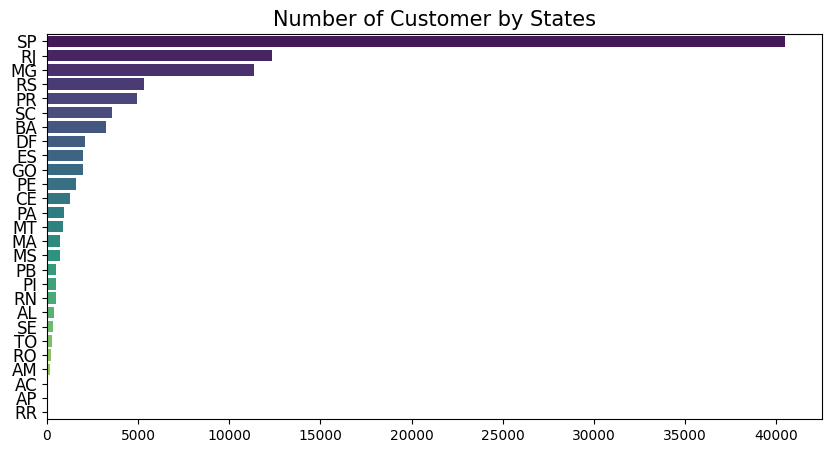

<ipython-input-236-5dfe87dace2a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


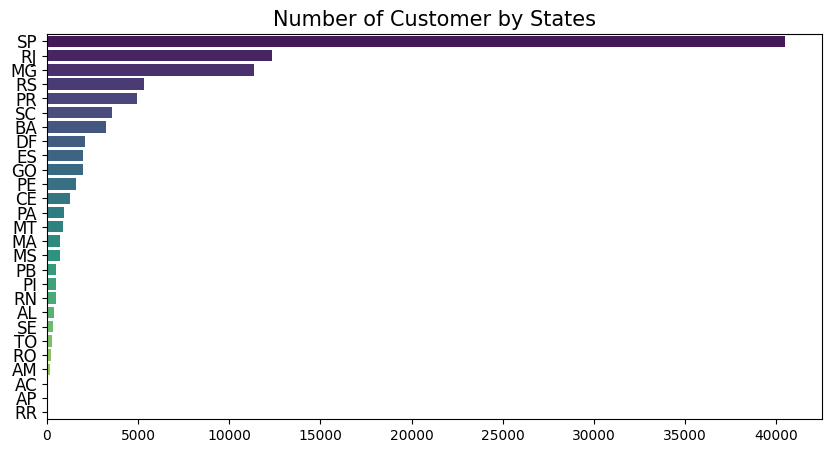

In [236]:
bystate_df = complete1_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette='viridis'
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Diatas merupakan tampilan bar dari hasil pembelian terbanyak yang diperoleh oleh masing-masing negara bagian dan pada bagian tersebut menunjukkan bahwa "SP" atau sao paolo merupakan negara bagian yang melakukan pembelian terbanyak. Selanjutnya kita akan melihat produk apa yang paling banyak dibeli pada "SP" yang merupakan negara bagian dengan pembelian terbanyak**

In [237]:
complete1_df.product_category_name_english.value_counts()

bed_bath_table               12471
health_beauty                 9467
sports_leisure                8429
furniture_decor               8156
computers_accessories         7643
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

bed_bath_table               12471
health_beauty                 9467
sports_leisure                8429
furniture_decor               8156
computers_accessories         7643
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [238]:
complete1_df.loc[complete1_df['customer_state'] == "SP"].product_category_name_english.value_counts()

bed_bath_table               5776
health_beauty                4126
sports_leisure               3574
furniture_decor              3452
housewares                   3184
                             ... 
fashion_sport                  12
flowers                        11
la_cuisine                      6
cds_dvds_musicals               6
fashion_childrens_clothes       4
Name: product_category_name_english, Length: 70, dtype: int64

bed_bath_table               5776
health_beauty                4126
sports_leisure               3574
furniture_decor              3452
housewares                   3184
                             ... 
fashion_sport                  12
flowers                        11
la_cuisine                      6
cds_dvds_musicals               6
fashion_childrens_clothes       4
Name: product_category_name_english, Length: 70, dtype: int64

<ipython-input-116-e3c066dee77c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


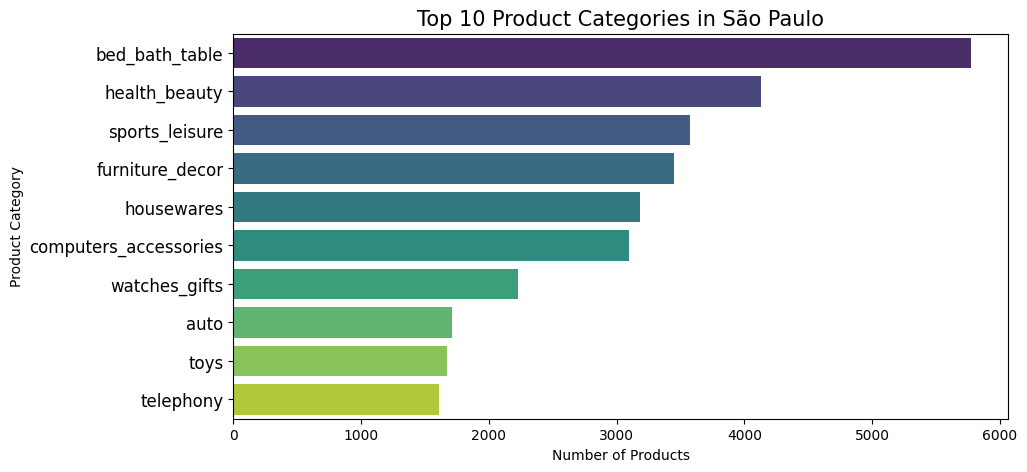

<ipython-input-239-e3c066dee77c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


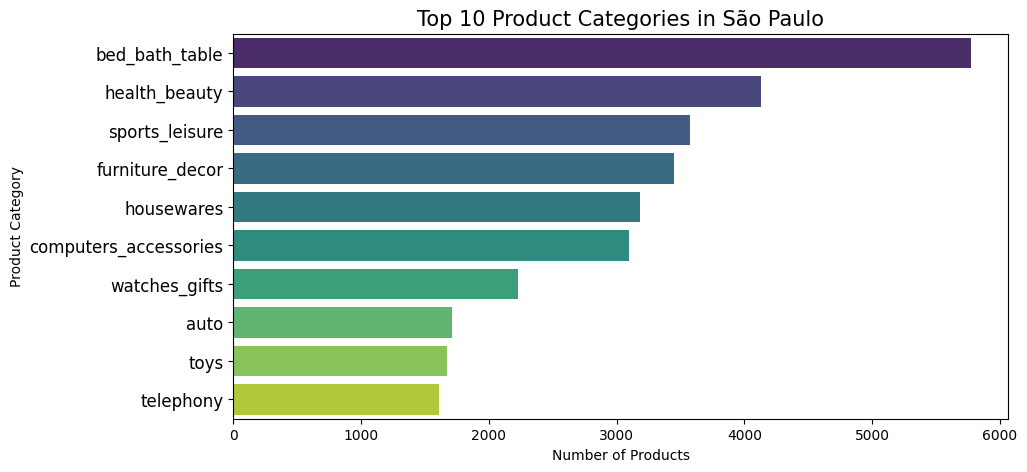

In [239]:
sp_product_categories = complete1_df.loc[complete1_df['customer_state'] == "SP", 'product_category_name_english']

sp_product_category_counts = sp_product_categories.value_counts()

sp_product_category_counts = sp_product_category_counts.reset_index()

sp_product_category_counts.columns = ['product_category_name_english', 'count']

top_10_product_categories = sp_product_category_counts.head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x='count',
    y='product_category_name_english',
    data=top_10_product_categories.sort_values(by='count', ascending=False),
    palette='viridis'
)
plt.title("Top 10 Product Categories in São Paulo", loc="center", fontsize=15)
plt.ylabel("Product Category")
plt.xlabel("Number of Products")
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana korelasi antara jenis pembayaran pengguna dengan tingkat kepuasan pengguna dalam data E-Commerce tersebut

In [240]:
order_payments_reviews_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-22 01:10:39


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Muito bom,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-22 01:10:39


In [241]:
order_payments_reviews_df.payment_type.value_counts()

credit_card    77198
boleto         19910
voucher         5830
debit_card      1536
not_defined        3
Name: payment_type, dtype: int64

credit_card    77198
boleto         19910
voucher         5830
debit_card      1536
not_defined        3
Name: payment_type, dtype: int64

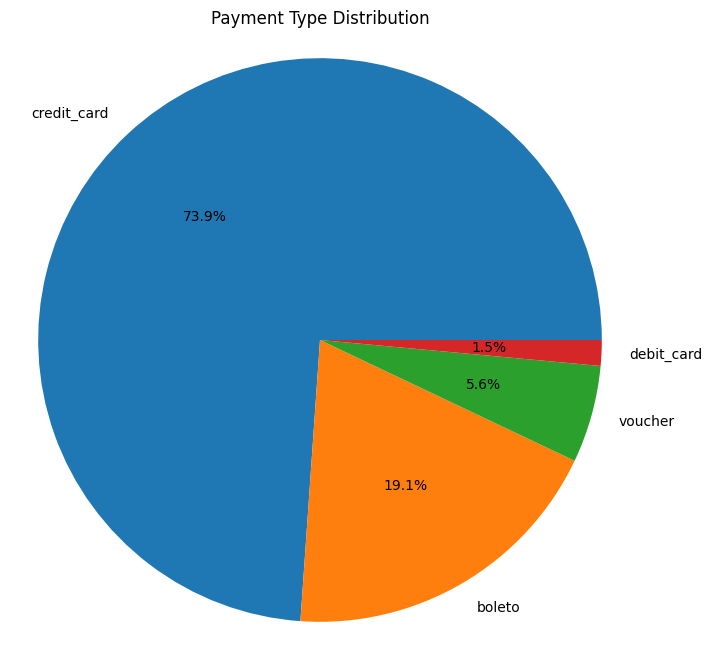

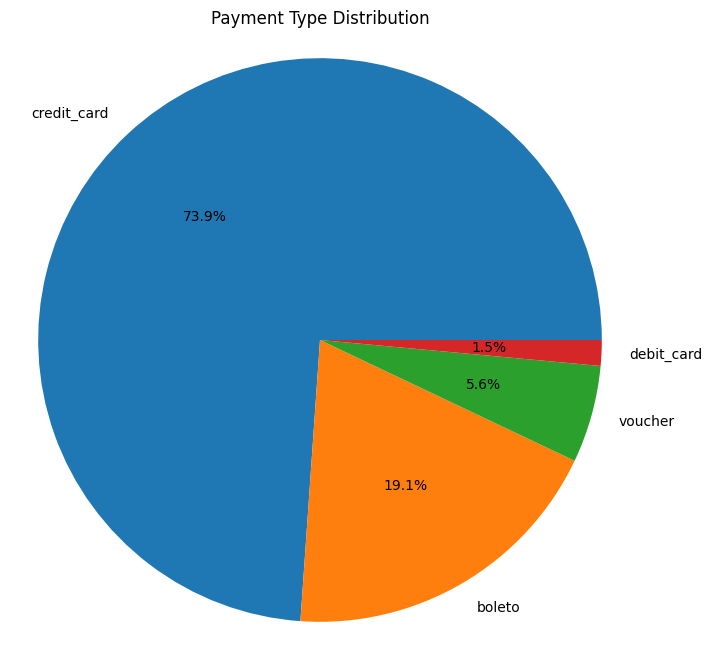

In [242]:
import matplotlib.pyplot as plt

payment_type_counts = [77198, 19910, 5830, 1536]
payment_types = ['credit_card', 'boleto', 'voucher', 'debit_card']

plt.figure(figsize=(8, 8))
plt.pie(payment_type_counts, labels=payment_types, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Payment Type Distribution')
plt.axis('equal')

plt.show()

**Bagian not_defined tidak dimasukkan dikarenakan hanya memiliki 3 data**

In [243]:
mean_payment = order_payments_reviews_df.groupby('payment_type')['review_score'].mean().sort_values(ascending=False)

print(mean_payment)

payment_type
debit_card     4.168084
credit_card    4.087637
boleto         4.086631
voucher        4.003804
not_defined    1.666667
Name: review_score, dtype: float64
payment_type
debit_card     4.168084
credit_card    4.087637
boleto         4.086631
voucher        4.003804
not_defined    1.666667
Name: review_score, dtype: float64


<ipython-input-121-7a3e0eab9a17>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_review_scores, y=payment_types, palette='viridis')


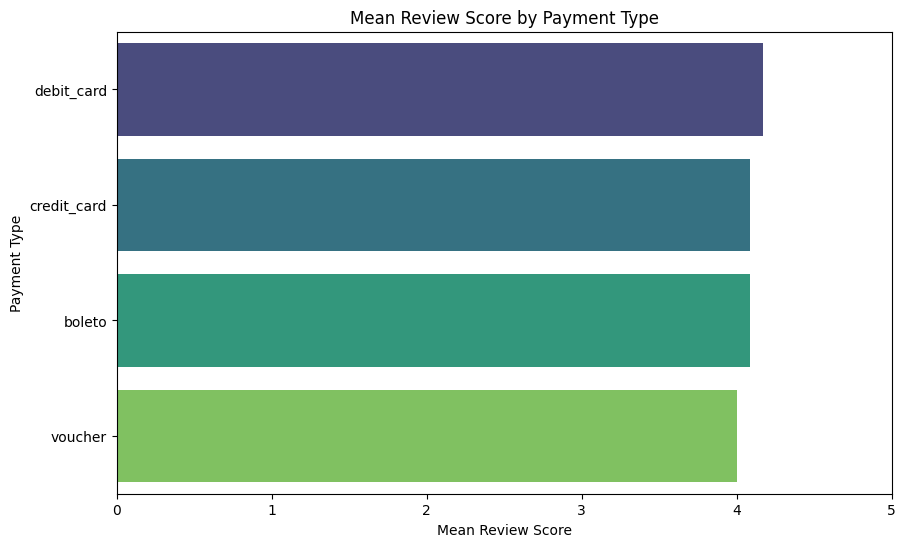

<ipython-input-244-7a3e0eab9a17>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_review_scores, y=payment_types, palette='viridis')


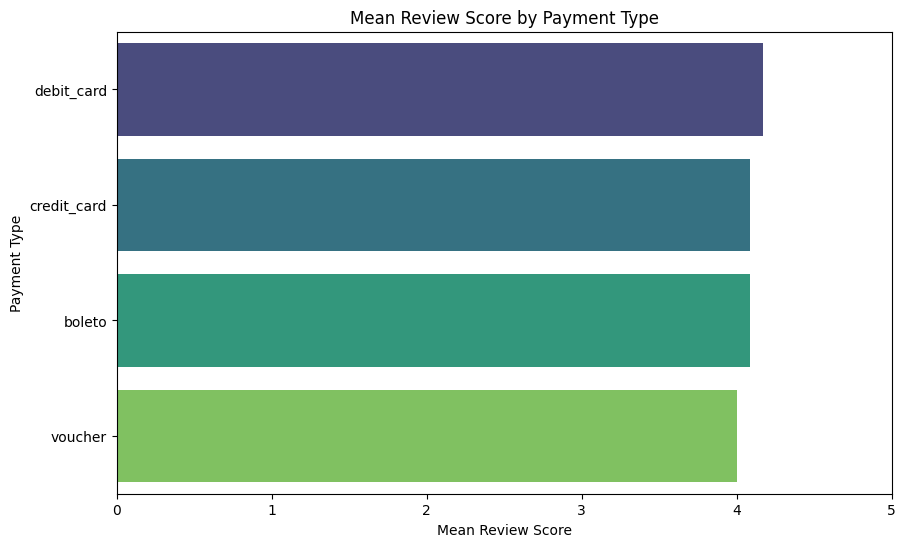

In [244]:
payment_types = ['debit_card', 'credit_card', 'boleto', 'voucher']
mean_review_scores = [4.168084, 4.087637, 4.086631, 4.003804]

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_review_scores, y=payment_types, palette='viridis')

plt.xticks(ticks=range(6), labels=range(6))

plt.title('Mean Review Score by Payment Type')
plt.xlabel('Mean Review Score')
plt.ylabel('Payment Type')

plt.show()

**Bagian not_defined tidak dimasukkan dikarenakan hanya memiliki 3 data**

## Conclusion

- Pembelian terbanyak pada masing-masing negara bagian berada pada negara bagian "SP" yang merupakan negara bagian Brazil yang merupakan singkatan dari São Paulo dengan kategori produk yang paling banyak dibeli pada negara bagian tersebut merupakan kategori bed_bath_table
- Korelasi antara jenis pembayaran pengguna dengan tingkat kepuasan dapat terlihat dari tabel yang dibuat dengan penggunaan mayoritas menggunakan credit_card paling banyak dilanjuti dengan boleto setelah itu voucher dan pada peringkat paling bawa dengan debit_card. Hubungan tingkat kepuasan pengguna dengan pembayaran pengguna rata-rata memiliki tingkat kepuasan semua diatas 4 rating score.